<a href="https://colab.research.google.com/github/disha-as/cars/blob/b2/Copy_of_CARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardekho_dataset.csv to cardekho_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import os
for dirname,_, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('cardekho_dataset.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.shape

(15411, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
df.isnull().mean()

,0
Unnamed: 0,0.0
car_name,0.0
brand,0.0
model,0.0
vehicle_age,0.0
km_driven,0.0
seller_type,0.0
fuel_type,0.0
transmission_type,0.0
mileage,0.0


In [ ]:
df.describe(include='all')

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411,15411,15411,15411.000000,1.541100e+04,15411,15411,15411,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
unique,NaN,121,32,120,NaN,NaN,3,5,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Hyundai i20,Maruti,i20,NaN,NaN,Dealer,Petrol,Manual,NaN,NaN,NaN,NaN,NaN
freq,NaN,906,4992,906,NaN,NaN,9539,7643,12225,NaN,NaN,NaN,NaN,NaN
mean,9811.857699,NaN,NaN,NaN,6.036338,5.561648e+04,NaN,NaN,NaN,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,NaN,NaN,NaN,3.013291,5.161855e+04,NaN,NaN,NaN,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,NaN,NaN,NaN,0.000000,1.000000e+02,NaN,NaN,NaN,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,NaN,NaN,NaN,4.000000,3.000000e+04,NaN,NaN,NaN,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,NaN,NaN,NaN,6.000000,5.000000e+04,NaN,NaN,NaN,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,NaN,NaN,NaN,8.000000,7.000000e+04,NaN,NaN,NaN,22.700000,1582.000000,117.300000,5.000000,8.250000e+05


In [ ]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [ ]:
print(df['fuel_type'].unique())
print(df['seller_type'].unique())
print(df['transmission_type'].unique())
print(df['car_name'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X

In [ ]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

/tmp/ipython-input-1313640594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.vehicle_age)


<Axes: xlabel='vehicle_age', ylabel='Density'>

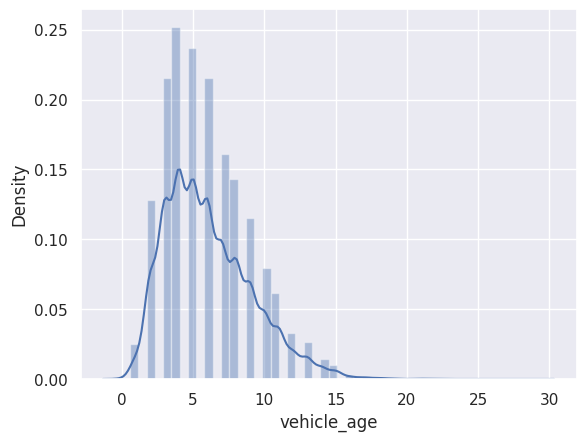

In [ ]:
sns.distplot(df.vehicle_age)

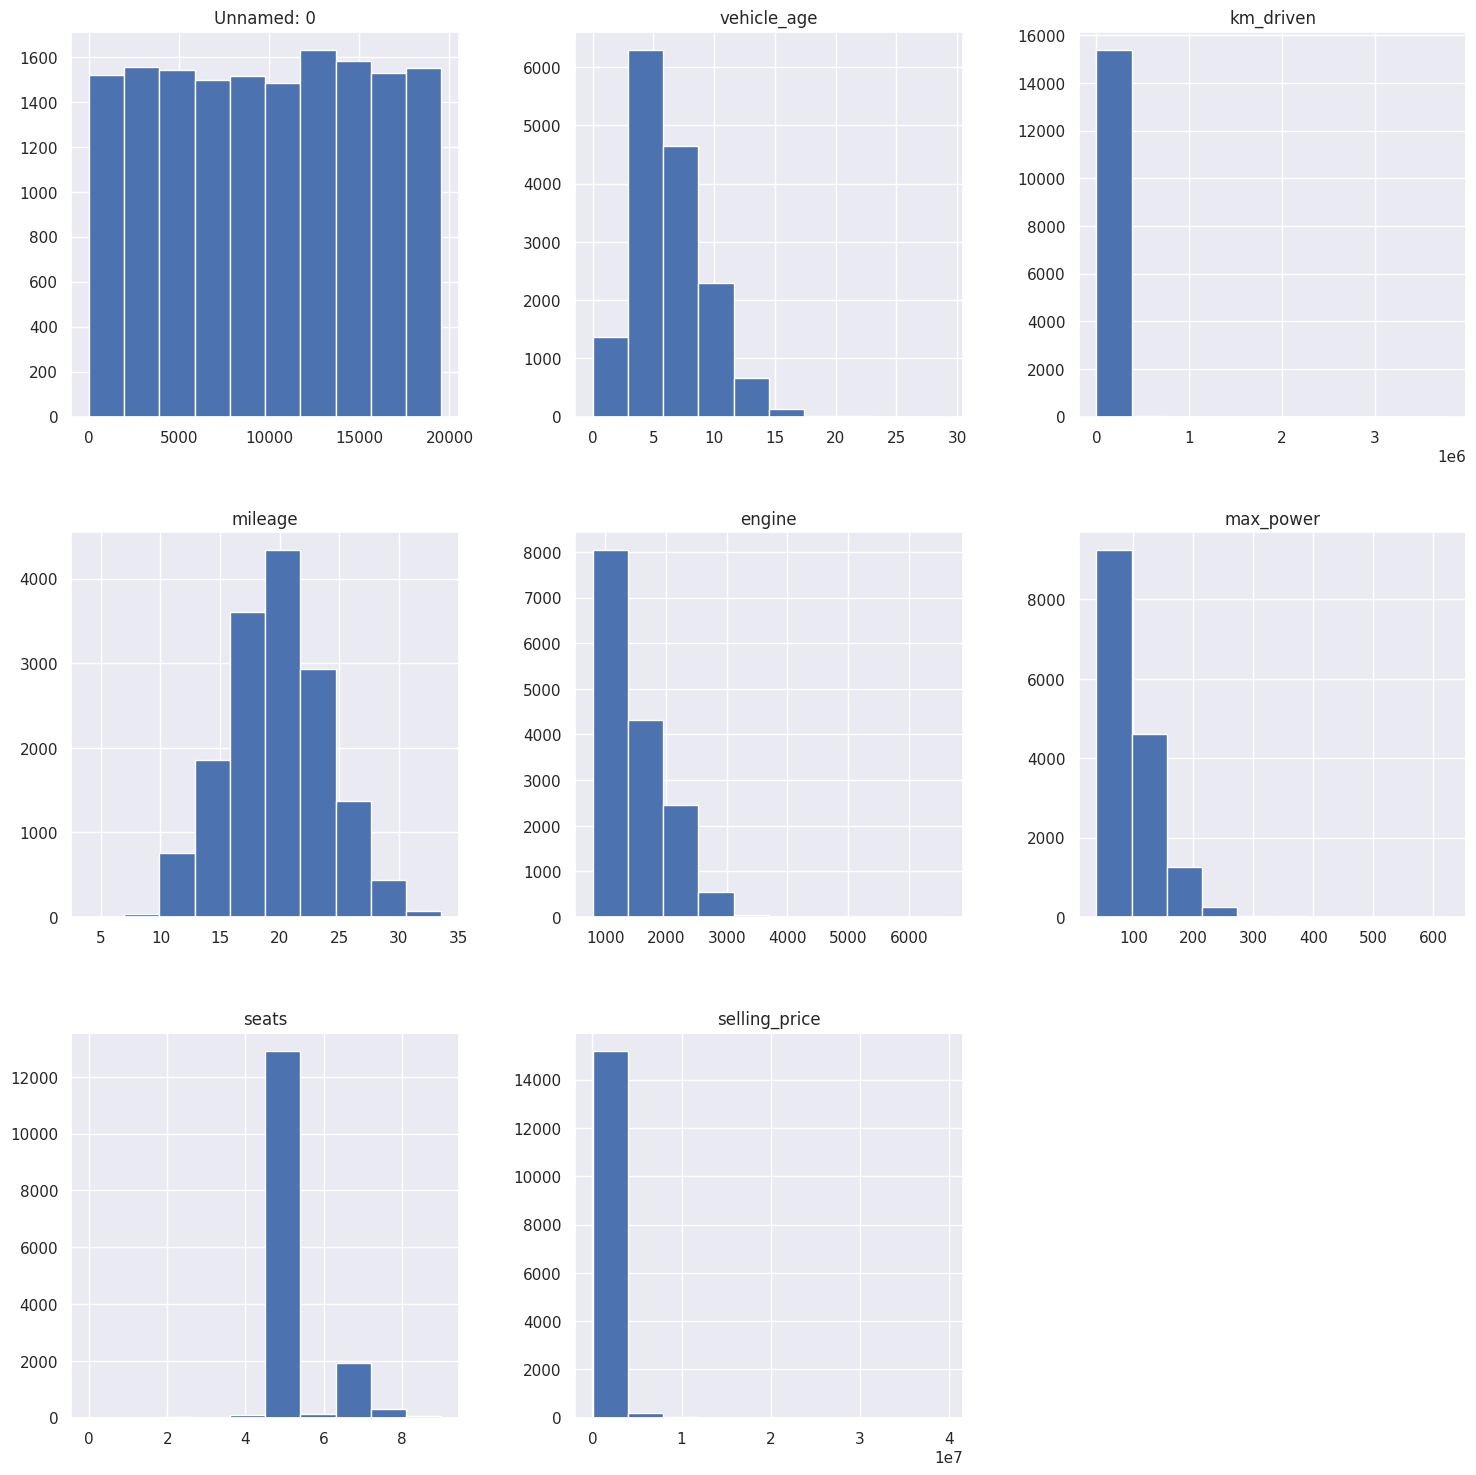

In [ ]:
fig = df.hist(figsize=(18,18))

/tmp/ipython-input-2507753689.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type',y='selling_price',data=df,palette='twilight')


<Axes: xlabel='seller_type', ylabel='selling_price'>

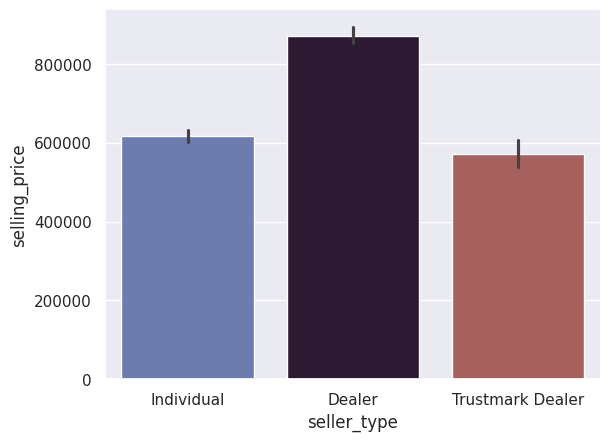

In [ ]:
sns.barplot(x='seller_type',y='selling_price',data=df,palette='twilight')

<Axes: xlabel='fuel_type', ylabel='selling_price'>

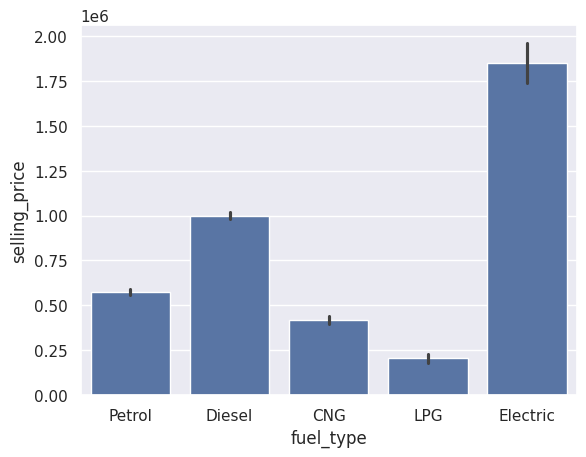

In [ ]:
sns.barplot(x='fuel_type',y='selling_price',data=df)

<Axes: xlabel='selling_price', ylabel='vehicle_age'>

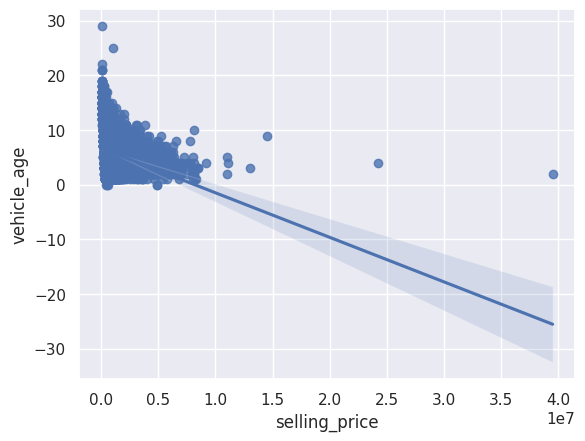

In [ ]:
sns.regplot(x='selling_price',y='vehicle_age',data=df)

<Axes: xlabel='selling_price', ylabel='km_driven'>

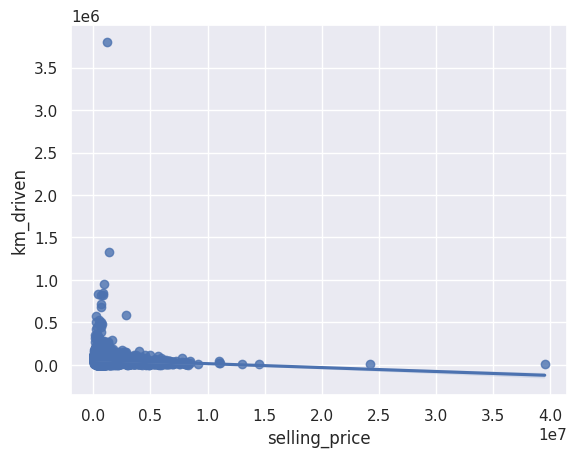

In [ ]:
sns.regplot(x='selling_price',y='km_driven',data=df)

/tmp/ipython-input-525074214.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transmission_type',y='selling_price',data=df,palette='spring')


<Axes: xlabel='transmission_type', ylabel='selling_price'>

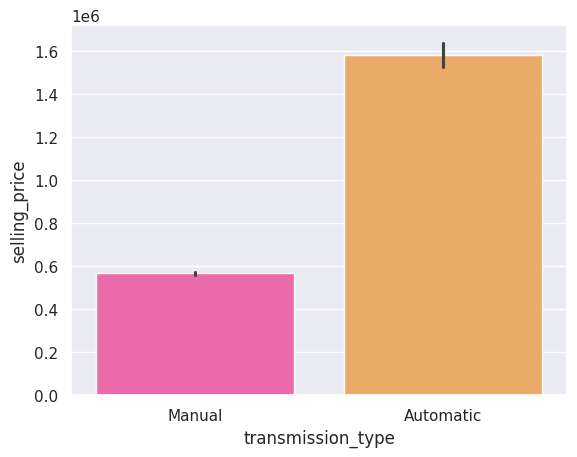

In [ ]:
sns.barplot(x='transmission_type',y='selling_price',data=df,palette='spring')

/tmp/ipython-input-2797416348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vehicle_age',y='selling_price',data=df,palette='ocean')


<Axes: xlabel='vehicle_age', ylabel='selling_price'>

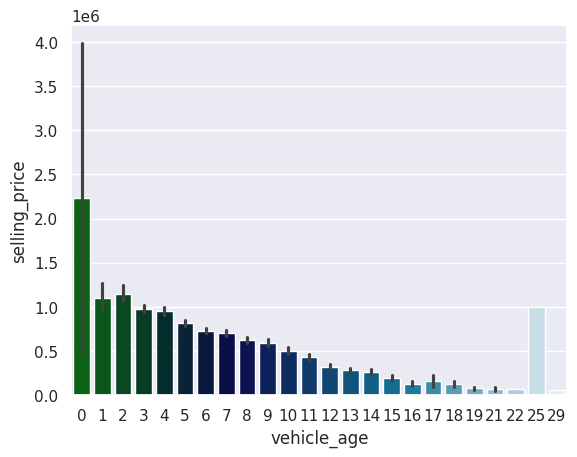

In [ ]:
sns.barplot(x='vehicle_age',y='selling_price',data=df,palette='ocean')

In [3]:
def plot_categorial(feature , dataset):
  ax = sns.countplot(y=feature, data=dataset)
  plt.title('distribution of' + feature)
  plt.xlabel('count')

  total= len(dataset[feature])
  for p in ax.patches:
           percentage = '{:.1f}%'.format(100* p.get_width()/total)
           x = p.get_x() + p.get_width() + 0.02
           y = p.get_y() + p.get_height()/2
           ax.annotate(percentage, (x, y))

  plt.show()